## DATA WRANGLING - @WERATEDOGS DATASET

In [226]:
# import installed packages
import pandas as pd
import numpy as np
import requests
import json
import tweepy
from tweepy import OAuthHandler
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [175]:
# setup tweepy
_consumer_key = ''
_consumer_secret = ''
_access_token = ''
_access_token_secret = ''

with open('auth_keys.txt', 'r') as auth_keys:
    try:
        _consumer_key = auth_keys.readline().split('"')[1:-1][0]
        _consumer_secret = auth_keys.readline().split('"')[1:-1][0]
        _access_token = auth_keys.readline().split('"')[1:-1][0]
        _access_token_secret = auth_keys.readline().split('"')[1:-1][0]
    except:
        raise Exception('Error: auth_keys.txt is missing or keys not found in source.')

auth = OAuthHandler(_consumer_key, _consumer_secret)
auth.set_access_token(_access_token, _access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [176]:
# reusable functions
def get_image_predictions_tsv():
    url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
    response = requests.get(url)
    with open('image-predictions.tsv', 'wb') as file:
        file.write(response.content)    

### 1. GATHERING DATA

In [177]:
# Gather data from memory
tweets_df = pd.read_csv("twitter-archive-enhanced.csv")
images_df = pd.read_csv("image-predictions.tsv", sep="\t")

In [178]:
# Get each tweet's status string using Tweepy 
with open('tweet_json.txt', mode='a') as file:
        for tweet_id in tweets_df['tweet_id']:
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                json.dump(tweet._json, file)
                file.write('\n')
                # print(tweet_status + '\n\n')
            except:
                continue

# Create a DataFrame with tweet_id, retweet_count and favorite_count for each tweet
twitter_data_list = []

for line in open('tweet_json.txt', 'r'):
    twitter_data = json.loads(line)
    twitter_data_list.append({
        'tweet_id': twitter_data['id_str'],
        'retweet_count': twitter_data['retweet_count'],
        'favorite_count': twitter_data['favorite_count']
    })

In [179]:
tweets_meta_df = pd.DataFrame(twitter_data_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

### 2. ASSESS

In [180]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [181]:
tweets_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [182]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


In [183]:
images_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [184]:
tweets_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null object
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


In [185]:
tweets_meta_df.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6969,33676
1,892177421306343426,5272,29206
2,891815181378084864,3464,21971
3,891689557279858688,7183,36752
4,891327558926688256,7715,35143


In [186]:
all_columns = pd.Series(list(tweets_df) + list(images_df) + list(tweets_meta_df))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [187]:
tweets_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 3. CLEANING DATA

#### QUALITY ISSUES 
##### Twitter Archive Enhanced Dataset 
- `tweet_ids, time_stamp column, rating_numerator, rating_denominator:` erronous data types [+]
- `source column:` values are unsanitized (contain HTML) [+]
- `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id column, retweeted_status_timestamp column, retweeted_status_timestamp:` not needed for analysis, should be dropped [+]
- `name column:`  non-name-like entries || mixed cases [+]
- `retweeted_status_user_id`: delete retweets [+]
##### Images Prediction Dataset
- `missing values:` 2075 rows instead of 2356 rows [+]
- `tweet_id column:` erroneous datatype [+]

##### Tweets Meta Dataset
- `tweet_id column:` erroneous datatype [+]

#### TIDINESS ISSUES
##### Twitter Archive Enhanced Dataset
- `img_num`: drop tweets with no images [+]
- `text column:` should be split into `tweet_text` and `tweet_url` [+]
- `doggo, floofer, pupper and puppo columns:` should be merged into a single column `dog_stage` [+]
##### Tweets Meta Dataset
- `retweet_count and favorite_count columns:` should be merged into the tweets_df [+]
##### Image Prediction Dataset
- `images_df` should be merged into the tweets_df [+]

In [188]:
# Make copies of the original data
clean_tweets = tweets_df.copy()
clean_images = images_df.copy()
clean_tweets_meta = tweets_meta_df.copy()

<b>Define</b><br />
Erronous datatypes

<b>Code</b>

In [189]:
clean_tweets.tweet_id = clean_tweets.tweet_id.astype(str)
clean_tweets.timestamp = pd.to_datetime(clean_tweets.timestamp)

clean_images.tweet_id = clean_images.tweet_id.astype(str)

clean_tweets_meta.tweet_id = clean_tweets_meta.tweet_id.astype(str)

<b>Test</b>

In [190]:
clean_tweets.info()
clean_images.info()
clean_tweets_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64

<b>Define</b><br />
Delete Retweets from the `clean_tweets` dataframe

<b>Code</b>

In [191]:
clean_tweets = clean_tweets[pd.isnull(clean_tweets['retweeted_status_user_id'])]

<b>Test</b>

In [192]:
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns, U

<b>Define</b><br />
Incorrect names for dogs. `a` names will be taken as None, otherwise name will be capitalized.

<b>Code</b>

In [193]:
import string


for index, row in clean_tweets.iterrows():
    try:
        if clean_tweets.loc[index, 'name'] == 'a':
            clean_tweets.loc[index, 'name'] = 'None'
        else:
            clean_tweets.loc[index, 'name'] = string.capwords(clean_tweets.loc[index, 'name'], sep=None)
    except:
        pass

<b>Test</b>

In [194]:
clean_tweets['name'].value_counts()

None         735
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Sadie          8
Winston        8
Lola           8
The            8
Toby           7
Daisy          7
Bella          6
Jax            6
An             6
Oscar          6
Stanley        6
Bailey         6
Bo             6
Koda           6
Chester        5
Dave           5
Milo           5
Leo            5
Buddy          5
Louis          5
Scout          5
Rusty          5
Bentley        5
            ... 
Pavlov         1
Suki           1
Creg           1
Stubert        1
Edgar          1
Zara           1
Brudge         1
Meatball       1
Lili           1
Grizzie        1
Mollie         1
Teddy          1
Snoop          1
Lenox          1
Jeremy         1
Philbert       1
Zooey          1
Todo           1
Kanu           1
Dawn           1
Balto          1
Steve          1
Laika          1
Socks          1
Eazy           1
Kane           1
Moreton        1
Finnegus      

<b>Define</b><br />
Drop unecessary columns

<b>Code</b>

In [195]:
clean_tweets = clean_tweets.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], 1)

<b>Test</b><br />

In [196]:
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 283.9+ KB


<b>Define</b><br />
`Source column` in tweets_df contains html <br/>
Strip out the html content from the value

<b>Code<b/>

In [197]:
for index, row in clean_tweets.iterrows():
    if (clean_tweets.loc[index, 'source']):
        soup = BeautifulSoup(clean_tweets.loc[index, 'source'])
        clean_tweets.loc[index, 'source'] = soup.find('a').text
    else:
        pass

<b>Test</b>

In [198]:
clean_tweets.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

<h3><b>Tidiness</b></h3>

<b>Define</b><br />
Drop tweets in `clean_tweets` with no images

<b>Code</b>

In [199]:
clean_tweets.dropna(axis=0, inplace=True)

<b>Test</b>

In [200]:
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 203.9+ KB


<b>Define</b> <br />
Text column in `tweets table` contains two variables: text and tweet_url <br />
Extract the <i>tweet_text</i> and <i>tweet_url</i> variables from the text column using regular expressions and the python `str.split()` method. Use an if-else conditional check when chcking url substring, since some rows are empty.

<b>Code</b>

In [201]:
tweet_text_list = []
tweet_url_list = []

for index, row in clean_tweets.iterrows():
    try:
        if ('https://' in clean_tweets.loc[index, 'text']):
            tweet_text_list.append(clean_tweets.loc[index, 'text'].split('https://')[0])
            tweet_url_list.append('https://' + clean_tweets.loc[index, 'text'].split('https://')[1])
        else:
            tweet_text_list.append('')
            tweet_url_list.append('')
    except:
        pass

clean_tweets['tweet_text'] = tweet_text_list
clean_tweets['tweet_url'] = tweet_url_list
clean_tweets = clean_tweets.drop('text', axis=1)

<b>Test</b>

In [202]:
clean_tweets.sample(5)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_text,tweet_url
1680,682003177596559360,2015-12-30 01:00:03+00:00,Twitter for iPhone,5,10,None,None,None,None,None,Unique dog here. Wrinkly as hell. Weird segmen...,https://t.co/Hy9La4xNX3
1862,675432746517426176,2015-12-11 21:51:30+00:00,Twitter for iPhone,12,10,None,None,None,None,None,Happy Friday. Here's some golden puppers. 12/1...,https://t.co/wNkqAED6lG
1292,708109389455101952,2016-03-11 01:56:49+00:00,Twitter for iPhone,10,10,Remington,None,None,None,None,This is Remington. He was caught off guard by ...,https://t.co/mhPSADiJmZ
1338,705066031337840642,2016-03-02 16:23:36+00:00,Twitter for iPhone,12,10,Reese,None,None,None,None,This is Reese. He's a Chilean Sohcahtoa. Loves...,https://t.co/VA6jnNUyuW
1539,689661964914655233,2016-01-20 04:13:20+00:00,Twitter for iPhone,12,10,Luca,None,None,None,None,Meet Luca. He's a Butternut Scooperfloof. Glor...,https://t.co/VcxZQPNZaV


<b>Define</b><br />
Merge the `images_df` and the `tweets_meta_df` into the `tweets_df`

<b>Code</b>

In [203]:
clean_tweets = pd.merge(left=clean_tweets, right=clean_tweets_meta, on='tweet_id', how='left')
clean_tweets = pd.merge(left=clean_tweets, right=clean_images, on='tweet_id', how='left')

<b>Test</b>

In [204]:
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 25 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
tweet_text            2175 non-null object
tweet_url             2175 non-null object
retweet_count         2167 non-null float64
favorite_count        2167 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf           

<b>Define</b><br />
`doggo, floofer, pupper and puppo columns:` should be merged into a single column `dog_stage`

<b>Code</b>

In [205]:
for index, row in clean_tweets.iterrows():
    stages = []
    stages.append(clean_tweets.loc[index, 'doggo'])
    stages.append(clean_tweets.loc[index, 'floofer'])
    stages.append(clean_tweets.loc[index, 'pupper'])
    stages.append(clean_tweets.loc[index, 'puppo'])
    if (stages.count('None') < 3):
        clean_tweets.loc[index, 'dog_stage'] = 'Multiple'
    else:
        if (stages.count('doggo') == 1):
            clean_tweets.loc[index, 'dog_stage'] = 'Doggo'
        elif (stages.count('floofer') == 1):
            clean_tweets.loc[index, 'dog_stage'] = 'Floofer'
        elif (stages.count('pupper') == 1):
            clean_tweets.loc[index, 'dog_stage'] = 'Pupper'
        elif (stages.count('puppo') == 1):
            clean_tweets.loc[index, 'dog_stage'] = 'Puppo'
        else:
            clean_tweets.loc[index, 'dog_stage'] = 'None'

# drop unecessary columns
clean_tweets = clean_tweets.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

<b>Test</b>

In [206]:
clean_tweets.info()
clean_tweets.dog_stage.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
tweet_text            2175 non-null object
tweet_url             2175 non-null object
retweet_count         2167 non-null float64
favorite_count        2167 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog          

None        1831
Pupper       224
Doggo         75
Puppo         24
Multiple      12
Floofer        9
Name: dog_stage, dtype: int64

<h3>Savin Master Dataset</h3>

In [207]:
clean_tweets.to_csv('twitter_archive_master.csv', index=False)

<h3>Analysis and Visualization of Clean Data</h3>

In [208]:
master_clean_tweets = pd.read_csv('twitter_archive_master.csv')

In [209]:
master_clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
tweet_text            2117 non-null object
tweet_url             2117 non-null object
retweet_count         2167 non-null float64
favorite_count        2167 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non

Convert datatype again. As most have been changed to object datatype after saving the master dataset

In [211]:
master_clean_tweets.tweet_id = master_clean_tweets.tweet_id.astype(str)
master_clean_tweets.source = master_clean_tweets.source.astype("category")
master_clean_tweets.timestamp = pd.to_datetime(master_clean_tweets.timestamp)
master_clean_tweets.dog_stage = master_clean_tweets.dog_stage.astype("category")

In [212]:
master_clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null category
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
tweet_text            2117 non-null object
tweet_url             2117 non-null object
retweet_count         2167 non-null float64
favorite_count        2167 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog        

<h4>1. POPULARITY OF SOURCES FOR TWEETS <br>
Where is the source of most tweets? <br> 

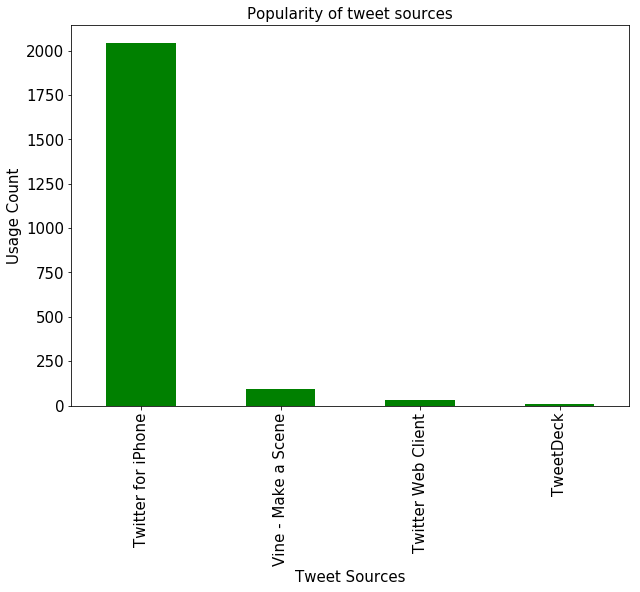

In [244]:
tweet_sources = master_clean_tweets.source.value_counts()

sources_bar_graph = tweet_sources.plot.bar(color='green', fontsize=15)

sources_bar_graph.figure.set_size_inches(10,7)

plt.title('Popularity of tweet sources', color = 'black', fontsize = '15')
plt.xlabel('Tweet Sources', color = 'black', fontsize = '15')
plt.ylabel('Usage Count', color = 'black', fontsize = '15');

plt.savefig('tweet_sources.png')

The most popular tweet source is `Twitter for iPhone`.

<h4>2. 5 MOST POPULAR DOG NAMES</h4>
Which names are so common among the dogs?

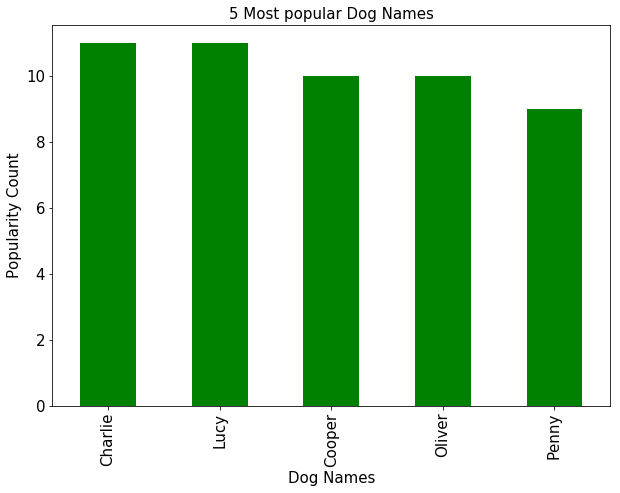

In [245]:
popular_dog_names = master_clean_tweets.name.value_counts().drop('None')[0:5]

names_bar_graph = popular_dog_names.plot.bar(color = 'green', fontsize=15)

names_bar_graph.figure.set_size_inches(10,7)

plt.title('5 Most popular Dog Names', color = 'black', fontsize = '15')
plt.xlabel('Dog Names', color = 'black', fontsize = '15')
plt.ylabel('Popularity Count', color = 'black', fontsize = '15')

plt.savefig('dog_names.png')

The 5 most popular dog names are Charlie, Lucy, Cooper, Oliver and Penny, in that order.

<h4>3. CORRELATION BETWEEN FAVORITE COUNT AND RETWEETS COUNT OF THE WERATEDOGS POSTS</h4>
Is there a relationship between how often tweets are retweeted compared to how often they are liked by users?

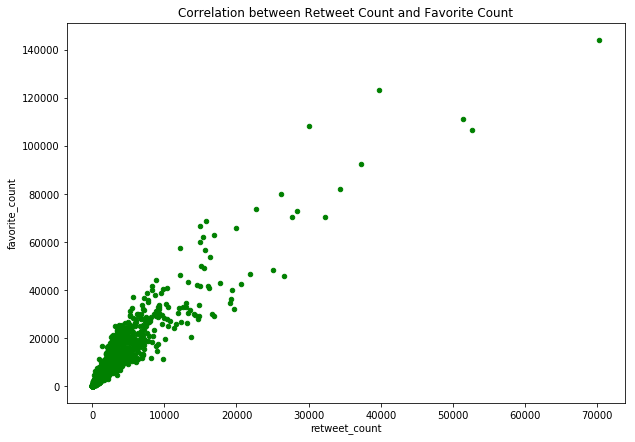

In [246]:
master_clean_tweets.plot(x='retweet_count', y='favorite_count', kind='scatter', title='Correlation between Retweet Count and Favorite Count', figsize=(10,7), color='green')

plt.savefig('likes_vs_retweets_corr.png')

In [239]:
master_clean_tweets['retweet_count'].corr(master_clean_tweets['favorite_count'])

0.9262542799659841

This implies a very high positive correlation between retweets count and tweet likes.